# Stroke detection with SVM (Support Vector Machine)

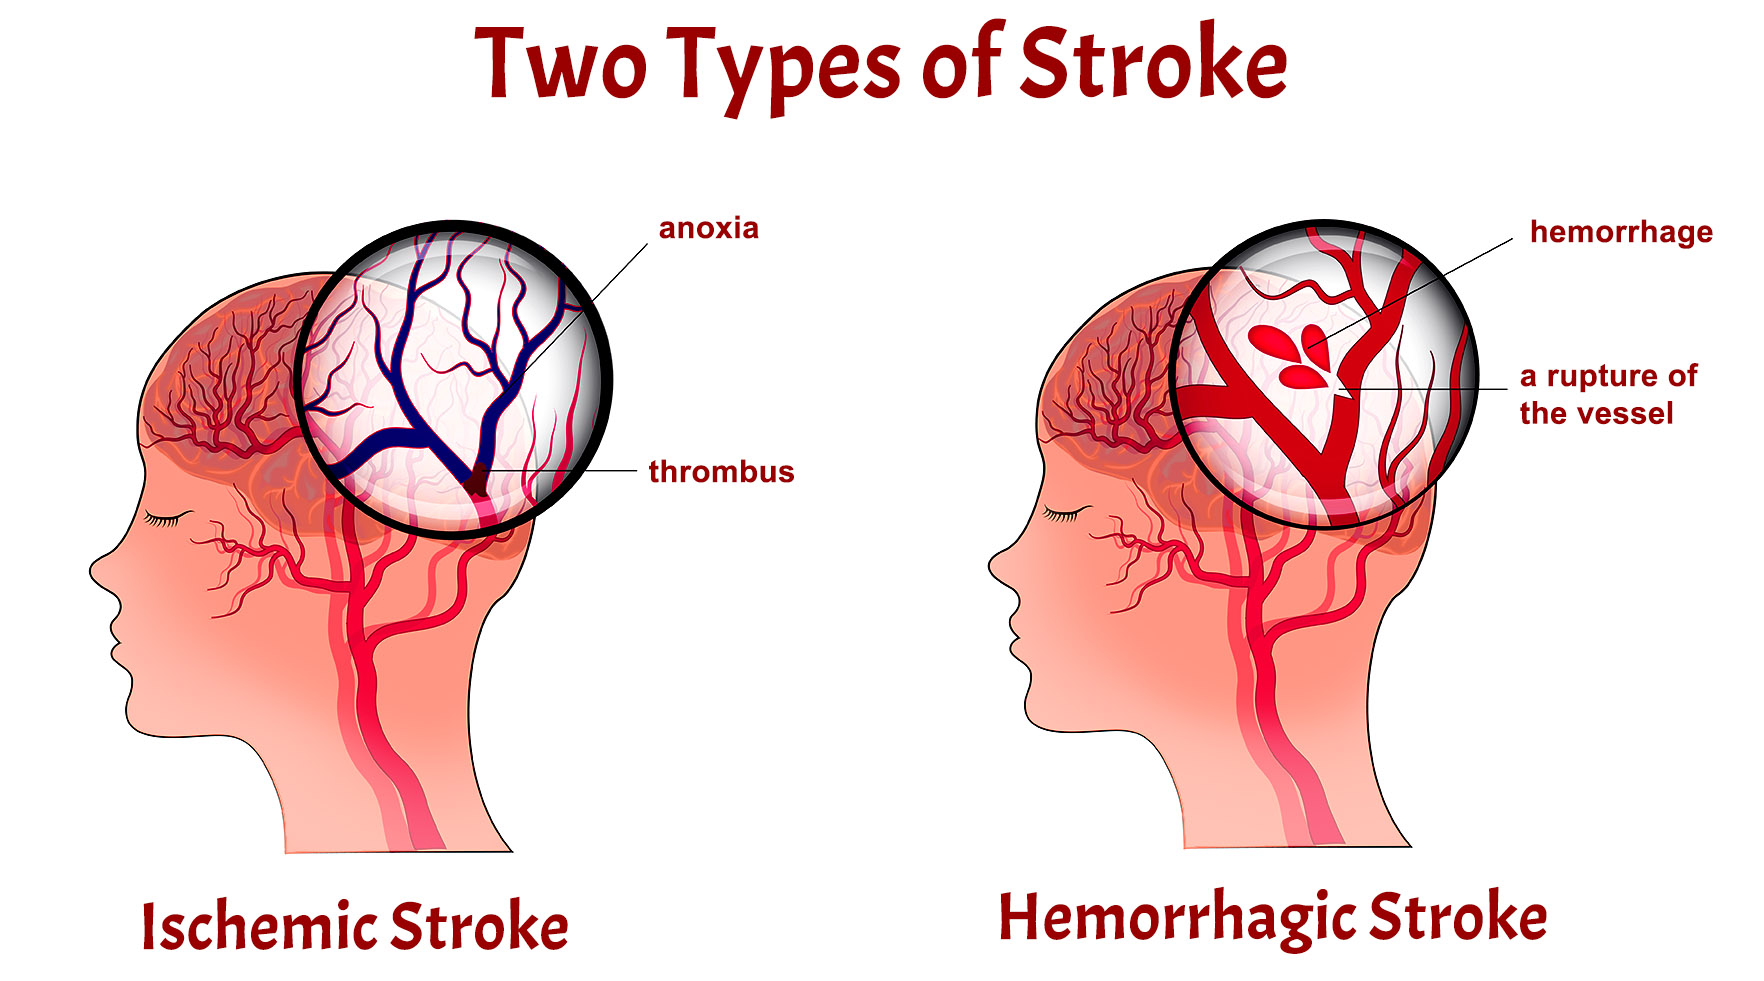

A brain stroke is characterized by cell deaths due to poor blood flow, which can lead to permanent damage on specific brain areas and improper functioning.
A stroke can be distinguished between two types: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding.
The effects of a stroke can be perceived as soon as it occurs and its symptoms can include numbness or weakness in the face, arm, or leg, especially on one side of the body, sudden severe headache, difficulty in seeing in one or both eyes or trouble speaking.

According to Center for Disease Control and Prevention (CDC), more than 795,000 people in the United States have a stroke on each year, leading to a high death rate, where, on 2020 alone, 1 in 6 deaths from cardiovascular disease were due it.
About 87% of all strokes occur due the blockade of blood flow to the brain, distinguishing it as an ischemic stroke.

Strokes are often caused by risk factors such as high blood pressure, high blood cholesterol, smoking, diabetes, obesity, atrial fibrillation or previous strokes.

### 1. Loading the data

Importing the packages that will be used on the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

Importing the stroke dataset.

In [2]:
df = pd.read_csv(r"C:\Users\Clara\Desktop\Data Science\Kaggle\stroke_data\full_data.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Now that the data is loaded on the df variable, we can see that it has the following variables for each individual:

 *  __gender__: Displays the individual gender (Male or Female);
 *  __age__: Displays the individual age;
 *  __hypertension__: Displays if the individual presented previous hypertension (1 for positive cases and 0 for negative ones);
 *  __heart_disease__: Displays if the individual presented previous heart diseases (1 for positive cases and 0 for negative ones);
 *  __ever_married__: Displays if the individual has married ("Yes" for positive cases and "No" for negative ones);
 *  __work_type__: Displays if the individual have a work place ("Private", "Self-employed", "Govt_job") or if it doesn't work ("children");
 *  __Residence_type__: Displays if the individual resides on an urban or rural area ("Urban" or "Rural");
 *  __avg_glucose_level__: Displays the average glucose level per individual;
 *  __bmi__: Displays the BMI (Body Mass Index) per individual;
 *  __smoking_status__: Displays if the individual is currently smoking status;
 *  __stroke__: Displays if the individual suffered from previous strokes (1 for positive cases and 0 for negative ones).
 

In [3]:
# Renaming "Residence_type" to "residence_type"
df.rename({'Residence_type' : 'residence_type'}, axis='columns', inplace=True)

### 2. Analysing the data

Since proper data is crucial for any project, the following steps focus on checking the dataset for missing values and other errors that could mislead our results, to avoid the "garbage-in, garbage-out" scenario.

First, we use _.shape_ to see how many observations and features the data have.

In [4]:
# Checking df shape
df.shape

(4981, 11)

Then, we proceed to use _.info()_ to see every column, check if there is any null value in it and display its data type:

In [5]:
# Checking df data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


Next, we check for correlation between the variables, to see if there is any relationship among them:

<AxesSubplot:>

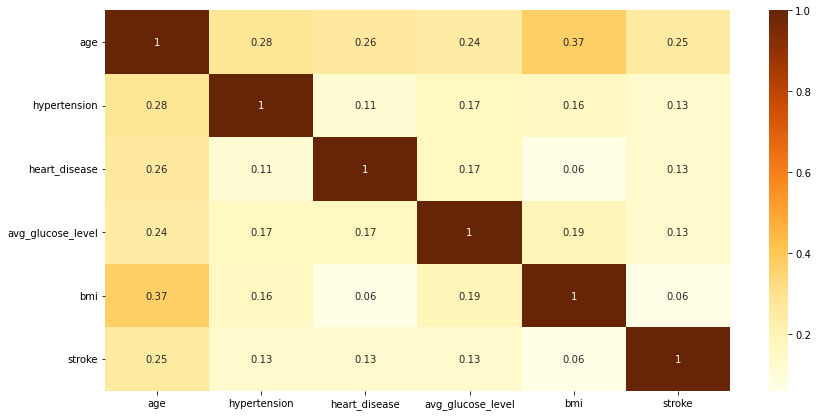

In [6]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

Then, we proceed to transform all variables with "object" data type to "boolean", which is crucial for implementing the SVM model:

In [7]:
# Transforming selected columns to boolean

df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0}) # The values "Yes" and "No" are replaced by 1 and 0

select_col = ['hypertension', 'heart_disease', 'ever_married', 'stroke']

for i in select_col:
    df[i] = df[i].astype('bool')

Proceeding with the analysis, we apply the _.isna()_ method with _.sum()_ to return the total number of Null values on each variable:

In [8]:
# Checking for missing values
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

After confirming that there is no missing values, we proceed to analyse if the unique values contained on each non-integer variable.

In [9]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
df['hypertension'].unique()

array([False,  True])

In [11]:
df['heart_disease'].unique()

array([ True, False])

In [12]:
df['ever_married'].unique()

array([ True, False])

In [13]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [14]:
df['residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [15]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [16]:
df['stroke'].unique()

array([ True, False])

We can see that, despite most variables presenting the expected values, __smoking_status__ contains an "Unknown" value that could represent an missing value, which must be further analysed.

Following the analysis, we will check for outliers on the numerical data:

<AxesSubplot:xlabel='variable', ylabel='value'>

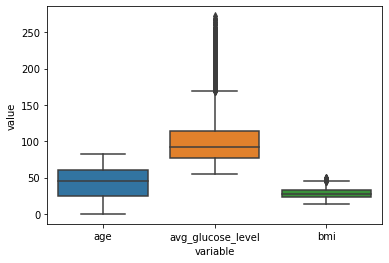

In [17]:
sns.boxplot(x='variable', y='value', data=pd.melt(df, value_vars=['age', 'avg_glucose_level', 'bmi']))

At first, __avg_glucose_level__ and __bmi__ show outliers, but since it do not displays unreal values, they won't be excluded from the data. 
Our decision is based on the information provided by CDC, which points ou that high glucose (e.g. blood sugar level over 200 mg/dL) indicates diabetes and, according to the National Health Service (NHS) in UK and the World Health Organization (WHO), BMI over 30 indicates obesity, both key illness on stroke cases.

Proceeding with the analysis, we turn back to the "Unknown" values on __smoking_status__:

In [18]:
len(df.loc[df['smoking_status'] == 'Unknown'])

1500

With "Unknown" values representing 30% of our data, we adopt two strategies, one considering it as a class, and the other removing it from the data.

In [19]:
df_no_miss = df.loc[df['smoking_status'] != 'Unknown']
df_no_miss.shape

(3481, 11)

In [20]:
df_no_miss.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,False,True,True,Private,Urban,228.69,36.6,formerly smoked,True
1,Male,80.0,False,True,True,Private,Rural,105.92,32.5,never smoked,True
2,Female,49.0,False,False,True,Private,Urban,171.23,34.4,smokes,True
3,Female,79.0,True,False,True,Self-employed,Rural,174.12,24.0,never smoked,True
4,Male,81.0,False,False,True,Private,Urban,186.21,29.0,formerly smoked,True


### 3. Visualizing the data.

The following step on the analysis focus on visualizing the data to understand its distribution and patterns.

First, we divide the data between numerical and categorical or boolean variable, since we will use different plot types for each:

In [21]:
# Distinguishing the data between two groups (Numerical and Categorical/Boolean)

col_1 = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
         'work_type', 'residence_type', 'smoking_status', 'stroke']

col_2 = ['age', 'avg_glucose_level', 'bmi']

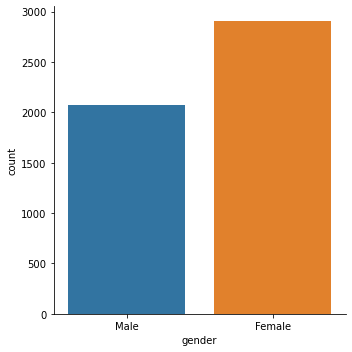

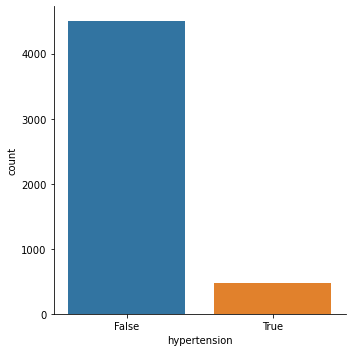

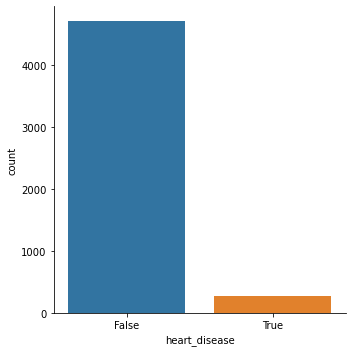

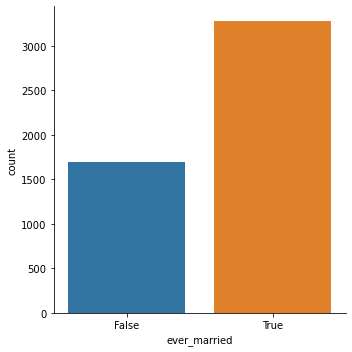

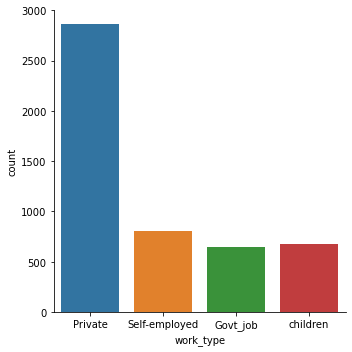

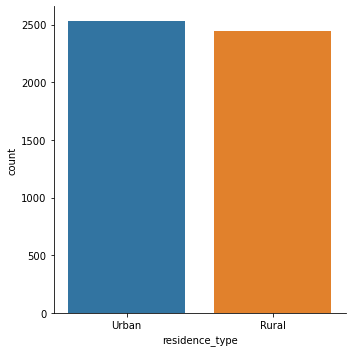

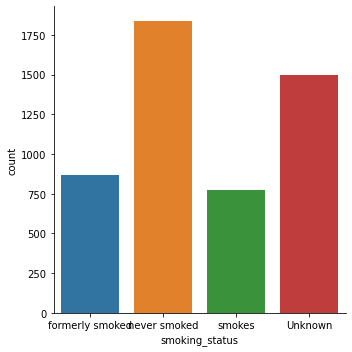

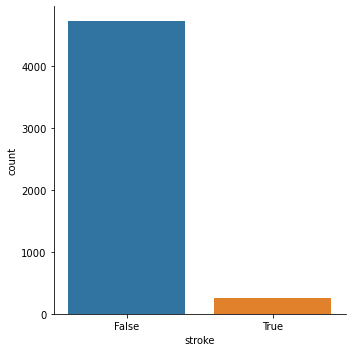

In [22]:
# Creating plot for categorical data

for col in col_1:
    sns.catplot(data=df, x=col, kind = 'count')

The data presents more female than male individuals, also, more individuals work on the private sector.
In addition, it can be seen that, among the categorical data, there are few positive cases for __hypertension__, __heart_disease__ and __stroke__.

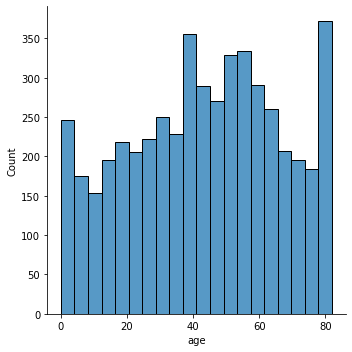

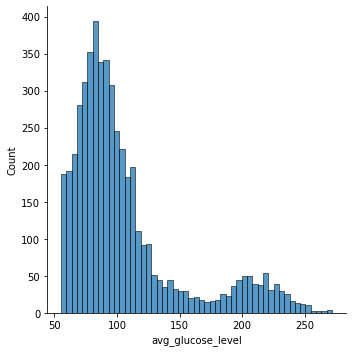

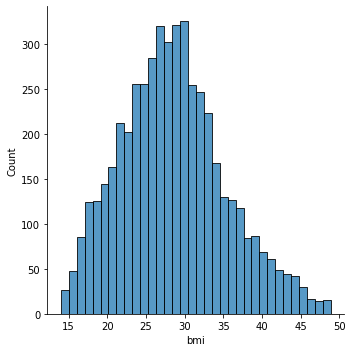

In [23]:
# Creating plot for numerical data

for col in col_2:
    sns.displot(data=df, x=col)

Then, we proceed to plot the __stroke__ cases with __age__, __bmi__ and __avg_glucose_level__ variables so we can see its consentration:

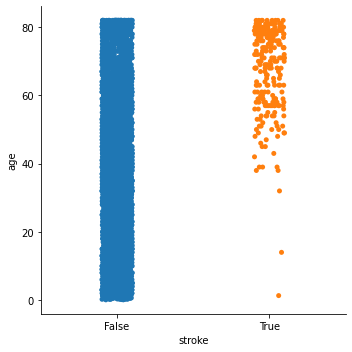

In [24]:
sns.catplot(x = "stroke", y = "age", data = df)

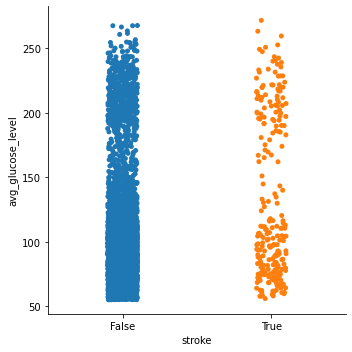

In [25]:
sns.catplot(x = "stroke", y = "avg_glucose_level", data = df)

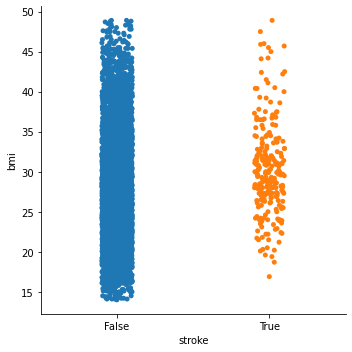

In [26]:
sns.catplot(x = "stroke", y = "bmi", data = df)

By plotting the stroke cases by age shows that stroke episodes tend to occur at a higher age.

### 4. Balancing the data

Since some variables presented higher observations on one of its classes, it creates an imbalance on the data that must be treated.
We will use both __under-sampling__ and __over-sampling__ techniques.

#### 4.a) Under-Sampling

In __Under-Sampling__, we will remove observations from the majority class (i.e. negative cases on __stroke__) until both classes are balanced out.

In [27]:
# Under-sampling df

class_0, class_1 = df['stroke'].value_counts()
df_0 = df[df['stroke'] == 0]
df_1 = df[df['stroke'] == 1]
df_0_res = df_0.sample(class_1)

df_under1 = pd.concat([df_1,df_0_res], axis=0)

df_under1['stroke'].value_counts()

True     248
False    248
Name: stroke, dtype: int64

In [28]:
# Under-sampling df_no_miss

class_0, class_1 = df_no_miss['stroke'].value_counts()
df_0 = df_no_miss[df_no_miss['stroke'] == 0]
df_1 = df_no_miss[df_no_miss['stroke'] == 1]
df_0_res = df_0.sample(class_1)

df_under2 = pd.concat([df_1,df_0_res], axis=0)

df_under2['stroke'].value_counts()

True     201
False    201
Name: stroke, dtype: int64

As displayed by the plot, both values for the __stroke__ variable are balanced.

#### 4.b) Over-Sampling

In __Over-Sampling__, we will add observations on the minority class (i.e. positive cases on __stroke__) until both classes are balanced out.

In [29]:
# Over-sampling df

class_0, class_1 = df['stroke'].value_counts()
df_0 = df[df['stroke'] == 0]
df_1 = df[df['stroke'] == 1]
df_1_res = df_1.sample(class_0, replace=True)

df_over1 = pd.concat([df_0,df_1_res], axis=0)

df_over1['stroke'].value_counts()

False    4733
True     4733
Name: stroke, dtype: int64

In [30]:
# Over-sampling df_no_miss

class_0, class_1 = df_no_miss['stroke'].value_counts()
df_0 = df_no_miss[df_no_miss['stroke'] == 0]
df_1 = df_no_miss[df_no_miss['stroke'] == 1]
df_1_res = df_1.sample(class_0, replace=True)

df_over2 = pd.concat([df_0,df_1_res], axis=0)

df_over2['stroke'].value_counts()

False    3280
True     3280
Name: stroke, dtype: int64

With data balanced both by under and over-sampling, we proceed to the model.

### 5. Modeling

#### 5.a) Under-sampled dataset with "Unknown" values

Our model approaches both under-sampled datasets. We begin with the main dataset, with "Unknown" values:

In [31]:
# One-hot encoding categorical variables
df = pd.get_dummies(df_under1, columns=['gender',
                                       'work_type',
                                       'residence_type',
                                       'smoking_status'],
                   drop_first=True)
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,False,True,True,228.69,36.6,True,1,1,0,0,1,1,0,0
1,80.0,False,True,True,105.92,32.5,True,1,1,0,0,0,0,1,0
2,49.0,False,False,True,171.23,34.4,True,0,1,0,0,1,0,0,1
3,79.0,True,False,True,174.12,24.0,True,0,0,1,0,0,0,1,0
4,81.0,False,False,True,186.21,29.0,True,1,1,0,0,1,1,0,0


In [32]:
# Creating the tables for the dependent and independent variables
X = df.drop('stroke', axis=1)
y = df['stroke']

In [33]:
# Spliting the data between train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [34]:
# Building a Support Vector Machine
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

After fitting each model, we will proceed to generate a confusion matrix (a.k.a. error matrix), so we can analize the model performance by visualizing the number of True Positives (TP), True Negatives (TN), False Positives (FP) and False Negatives (FN) cases.

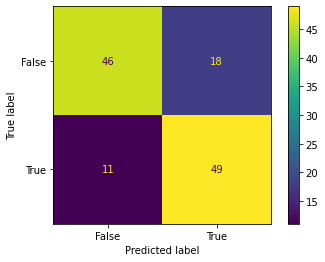

In [35]:
ConfusionMatrixDisplay.from_estimator(clf_svm,
                                      X_test_scaled,
                                      y_test)

In [36]:
prediction = clf_svm.predict(X_test_scaled)
svm_score_under_unk = accuracy_score(prediction, y_test)
print(svm_score_under_unk)

0.7661290322580645


On the following steps, we proceed to find the best parameters for __gamma__ and __C__ to reach model optimization.
__C__ is a regularization hyperparameter, which sets its strength on the model, the higher the value for it, the lower will be the strength.
__gamma__ corresponds to the Kernel coefficient.

In [37]:
params = [
    {'C': [0.5, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']}
]

optimal_params = GridSearchCV(
                            SVC(),
                            params,
                            cv=5,
                            scoring='accuracy'
)

optimal_params.fit(X_train_scaled, y_train)
optimal_params.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

And, as we can see, the best values for __C__ and __gamma__ are 100 and 0.001, respectively.

Using this result we build another SVM:

In [38]:
clf_svm_opt = SVC(C=100, gamma=0.001, kernel='rbf', random_state=42)
clf_svm_opt.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=42)

Then we proceed to build the confusion matrix:

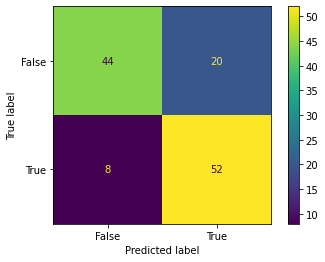

In [39]:
ConfusionMatrixDisplay.from_estimator(clf_svm_opt,
                                      X_test_scaled,
                                      y_test
)

In [40]:
prediction = clf_svm_opt.predict(X_test_scaled)
opt_svm_score_under_unk = accuracy_score(prediction, y_test)
print(opt_svm_score_under_unk)

0.7741935483870968


#### 5.b) Under-sampled dataset without "Unknown" values.

We now turn to the under-sampled dataset without the "Unknown" values on the __smoking_status__ and replay the whole process:

In [41]:
# One-hot encoding categorical variables
df = pd.get_dummies(df_under2, columns=['gender',
                                       'work_type',
                                       'residence_type',
                                       'smoking_status'],
                   drop_first=True)
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,67.0,False,True,True,228.69,36.6,True,1,1,0,0,1,0,0
1,80.0,False,True,True,105.92,32.5,True,1,1,0,0,0,1,0
2,49.0,False,False,True,171.23,34.4,True,0,1,0,0,1,0,1
3,79.0,True,False,True,174.12,24.0,True,0,0,1,0,0,1,0
4,81.0,False,False,True,186.21,29.0,True,1,1,0,0,1,0,0


In [42]:
# Creating the tables for the dependent and independent variables
X = df.drop('stroke', axis=1)
y = df['stroke']

In [43]:
# Spliting the data between train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [44]:
# Building a Support Vector Machine
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

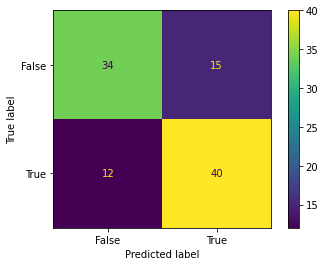

In [45]:
ConfusionMatrixDisplay.from_estimator(clf_svm,
                                      X_test_scaled,
                                      y_test)

In [46]:
prediction = clf_svm.predict(X_test_scaled)
svm_score_under_nounk = accuracy_score(prediction, y_test)
print(svm_score_under_nounk)

0.7326732673267327


In [47]:
# Parameters optimization

params = [
    {'C': [0.5, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : ['rbf']}
]

optimal_params = GridSearchCV(
                            SVC(),
                            params,
                            cv=5,
                            scoring='accuracy'
)

optimal_params.fit(X_train_scaled, y_train)
optimal_params.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [48]:
clf_svm_opt = SVC(C=10, gamma=0.01, kernel='rbf', random_state=42)
clf_svm_opt.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.01, random_state=42)

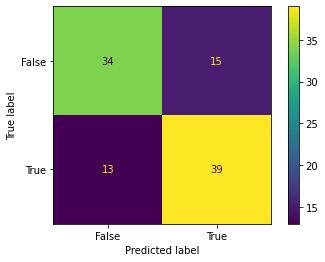

In [49]:
ConfusionMatrixDisplay.from_estimator(clf_svm_opt,
                                      X_test_scaled,
                                      y_test
)

In [50]:
prediction = clf_svm_opt.predict(X_test_scaled)
opt_svm_score_under_nounk = accuracy_score(prediction, y_test)
print(opt_svm_score_under_nounk)

0.7227722772277227


#### 5.c) Over-sampled datasets with "Unknown" variables

The following models approaches the over-sampled datasets. We begin with the main dataset, with "Unknown" values:

In [51]:
# One-hot encoding categorical variables
df = pd.get_dummies(df_over1, columns=['gender',
                                       'work_type',
                                       'residence_type',
                                       'smoking_status'],
                   drop_first=True)
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
208,3.0,False,False,False,95.12,18.0,False,1,0,0,1,0,0,0,0
209,58.0,True,False,True,87.96,39.2,False,1,1,0,0,1,0,1,0
210,8.0,False,False,False,110.89,17.6,False,0,1,0,0,1,0,0,0
211,70.0,False,False,True,69.04,35.9,False,0,1,0,0,0,1,0,0
212,52.0,False,False,True,77.59,17.7,False,0,1,0,0,1,1,0,0


In [52]:
# Creating the tables for the dependent and independent variables
X = df.drop('stroke', axis=1)
y = df['stroke']

In [53]:
# Spliting the data between train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [54]:
# Building a Support Vector Machine
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

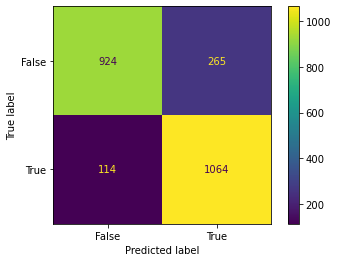

In [55]:
ConfusionMatrixDisplay.from_estimator(clf_svm,
                                      X_test_scaled,
                                      y_test)

In [56]:
prediction = clf_svm.predict(X_test_scaled)
svm_score_over_unk = accuracy_score(prediction, y_test)
print(svm_score_over_unk)

0.8398817068018589


We proceed to find the best parameters for __gamma__ and __C__ to reach model optimization.

In [57]:
params = [
    {'C': [0.5, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : ['rbf']}
]

optimal_params = GridSearchCV(
                            SVC(),
                            params,
                            cv=5,
                            scoring='accuracy'
)

optimal_params.fit(X_train_scaled, y_train)
optimal_params.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

And, as displayed, the best values for __C__ and __gamma__ are 100 and 1, respectively.

Using this result we build the optimized SVM:

In [58]:
clf_svm_opt = SVC(C=100, gamma=1, kernel='rbf', random_state=42)
clf_svm_opt.fit(X_train_scaled, y_train)

SVC(C=100, gamma=1, random_state=42)

Then we proceed to build the confusion matrix:

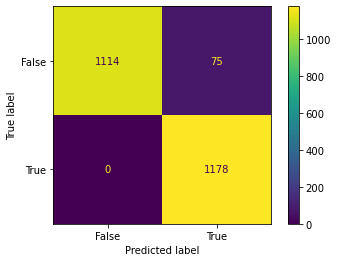

In [59]:
ConfusionMatrixDisplay.from_estimator(clf_svm_opt,
                                      X_test_scaled,
                                      y_test
)

In [60]:
prediction = clf_svm_opt.predict(X_test_scaled)
opt_svm_score_over_unk = accuracy_score(prediction, y_test)
print(opt_svm_score_over_unk)

0.9683143219264893


#### 5.d) Over-sampled dataset without "Unknown" values.

We now turn to the under-sampled dataset without the "Unknown" values on the __smoking_status__ and replay the whole process:

In [61]:
# One-hot encoding categorical variables
df = pd.get_dummies(df_over2, columns=['gender',
                                       'work_type',
                                       'residence_type',
                                       'smoking_status'],
                   drop_first=True)
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
209,58.0,True,False,True,87.96,39.2,False,1,1,0,0,1,1,0
211,70.0,False,False,True,69.04,35.9,False,0,1,0,0,0,0,0
212,52.0,False,False,True,77.59,17.7,False,0,1,0,0,1,0,0
213,75.0,False,True,True,243.53,27.0,False,0,0,1,0,0,1,0
214,32.0,False,False,True,77.67,32.3,False,0,1,0,0,0,0,1


In [62]:
# Creating the tables for the dependent and independent variables
X = df.drop('stroke', axis=1)
y = df['stroke']

In [63]:
# Spliting the data between train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [64]:
# Building a Support Vector Machine
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

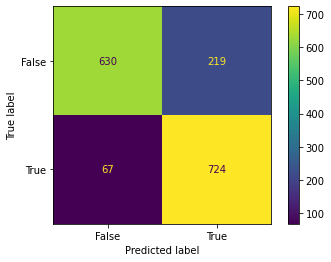

In [65]:
ConfusionMatrixDisplay.from_estimator(clf_svm,
                                      X_test_scaled,
                                      y_test)

In [66]:
prediction = clf_svm.predict(X_test_scaled)
svm_score_over_nounk = accuracy_score(prediction, y_test)
print(svm_score_over_nounk)

0.8256097560975609


In [67]:
# Parameters optimization

params = [
    {'C': [0.5, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : ['rbf']}
]

optimal_params = GridSearchCV(
                            SVC(),
                            params,
                            cv=5,
                            scoring='accuracy'
)

optimal_params.fit(X_train_scaled, y_train)
optimal_params.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [68]:
clf_svm_opt = SVC(C=100, gamma=1, kernel='rbf', random_state=42)
clf_svm_opt.fit(X_train_scaled, y_train)

SVC(C=100, gamma=1, random_state=42)

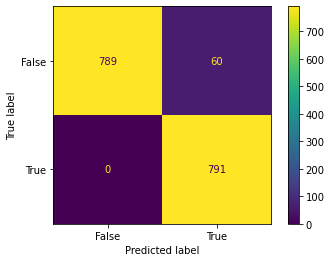

In [69]:
ConfusionMatrixDisplay.from_estimator(clf_svm_opt,
                                      X_test_scaled,
                                      y_test
)

In [70]:
prediction = clf_svm_opt.predict(X_test_scaled)
opt_svm_score_over_nounk = accuracy_score(prediction, y_test)
print(opt_svm_score_over_nounk)

0.9634146341463414


### 6. Results

On the following section we proceed to exhibit the models results.

Starting by the under-sampled datasets:

In [71]:
print('Base models:' + '\n'
      'Accuracy for under-sampled dataset ("Unknown" values): {:.2f}%'.format(svm_score_under_unk*100) +'\n'
      'Accuracy for under-sampled dataset (without "Unknown" values): {:.2f}%'.format(svm_score_under_nounk*100) +'\n'
      + '\n'
      'Optimized models:' + '\n'
      'Accuracy for under-sampled dataset ("Unknown" values): {:.2f}%'.format(opt_svm_score_under_unk*100) + '\n'
      'Accuracy for under-sampled dataset (without "Unknown" values): {:.2f}%'.format(opt_svm_score_under_nounk*100))

Base models:
Accuracy for under-sampled dataset ("Unknown" values): 76.61%
Accuracy for under-sampled dataset (without "Unknown" values): 73.27%

Optimized models:
Accuracy for under-sampled dataset ("Unknown" values): 77.42%
Accuracy for under-sampled dataset (without "Unknown" values): 72.28%


We can see that the optimized model presented higher accuracy for the data with "Unknown" values, as expected, and the datasets that do not consider "Unknown" values for __smoking_status__ also presented lower performance.

The following results come from the over-sampled datasets:

In [72]:
print('Base models:' + '\n'
      'Accuracy for over-sampled dataset ("Unknown" values): {:.2f}%'.format(svm_score_over_unk*100) +'\n'
      'Accuracy for over-sampled dataset (without "Unknown" values): {:.2f}%'.format(svm_score_over_nounk*100) +'\n'
      + '\n'
      'Optimized models:' + '\n'
      'Accuracy for over-sampled dataset ("Unknown" values): {:.2f}%'.format(opt_svm_score_over_unk*100) + '\n'
      'Accuracy for over-sampled dataset (without "Unknown" values): {:.2f}%'.format(opt_svm_score_over_nounk*100))

Base models:
Accuracy for over-sampled dataset ("Unknown" values): 83.99%
Accuracy for over-sampled dataset (without "Unknown" values): 82.56%

Optimized models:
Accuracy for over-sampled dataset ("Unknown" values): 96.83%
Accuracy for over-sampled dataset (without "Unknown" values): 96.34%


For the over-sampled datasets the optimized models also displayed better accuracy, although, the models that considered the "Unknown" values provided better results, simmilar to the under-sampled datasets.
Overall, all the results provided by the over-sampled datasets displayed remarkably improvements, mainly due to the loss of information caused by the under-sampling balancing method.

Moreover, all models presented low FN rates (Type II error), with some achieving 0 occurrences of it. 
This result is crucial due to the nature of the problem, since the model will not predict as "false" a result that should be "true", it won't risk the health of a pacient that should be on alert.

### 7. Conclusion

The data considered in this project proved to be useful to understand strokes occurrence. At the beginning, on the EDA (Exploratory Data Analysis) we could already see that stroke episodes are more likely to concentrate at older ages, although it appears to be homogeneous among BMI and glucose levels.

We could also see that our target variable (__stroke__) were unbalanced, which could led us to spurious results. 
To treat that, we employed two balancing methods, Under-Sampling and Over-Sampling. 
The models using the under-sampled datasets performed poorly since it occured on information loss due to the observation reduction.
Furthermore, over-sampling the positive cases for the target variable proved to be best strategy, providing good results, with zero occurrences of Type II errors (False Negative) and good accuracy for the SVM model.